In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import itertools
import sys
import sklearn.preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout
import time


sys.path.append("../1_Format_donnees/")
sys.path.append("../")
from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
from evaluate import plot_confusion_matrix, get_scores

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 5

In [3]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)

df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_test


Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 108.81it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 44.86it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 112.73it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.76it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.01it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.90it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.49it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1128.91it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.67it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 37.67it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.33it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 47.25it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 30.27it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.81it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.79it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 1027.11it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1346.55it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1358.15it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.48it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 49.95it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 79.11it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 104.64it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 241.46it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 860.11it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 735.40it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 308.56it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1172.71it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1177.98it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 903.41it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1108.43it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1128.01it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 638.59it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 855.22it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 641.27it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 972.74it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 347.98it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 320.27it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:23<00:00, 234.11it/s]


Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.48it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.11it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.37it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1124.39it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 21.55it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|██████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 1227.97it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:08<00:00, 86.62it/s]


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221124_151137_4_0,308.521739,687.88587,1067.25,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_5,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,630.967742,874.037351,1117.106961,1360.17657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_10,1713.333333,630.967742,874.037351,1117.106961,1360.17657,1603.24618,1846.315789,696.0,638.2,580.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_15,1603.24618,1846.315789,696.0,638.2,580.4,439.466667,556.0,1007.304348,965.653333,1316.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_20,439.466667,556.0,1007.304348,965.653333,1316.5,1177.333333,1649.066667,1245.666667,1168.238596,1090.810526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_121925_263_25,2166.358632,2026.580239,1886.801846,1747.023453,1607.24506,1467.466667,913.959748,360.45283,348.902516,337.352201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_30,1467.466667,913.959748,360.45283,348.902516,337.352201,325.801887,314.251572,302.701258,291.150943,279.600629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_35,325.801887,314.251572,302.701258,291.150943,279.600629,268.050314,256.5,252.8,355.158974,457.517949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_40,268.050314,256.5,252.8,355.158974,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


# Noise

In [4]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,320.0,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_5,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,933.424242,1029.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_10,644.242424,740.636364,837.030303,933.424242,1029.818182,849.363636,668.909091,488.454545,308.0,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_15,849.363636,668.909091,488.454545,308.0,258.0,318.823529,374.048588,429.273647,484.498705,539.723764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_20,318.823529,374.048588,429.273647,484.498705,539.723764,594.948822,650.173881,705.398939,760.623998,815.849057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,587.128781,537.9422,488.755619,439.569038,390.382457,341.195876,2458.325333,2424.260267,2390.1952,2356.130133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_30,341.195876,2458.325333,2424.260267,2390.1952,2356.130133,2322.065067,2288.0,1816.727273,1345.454545,874.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_35,2322.065067,2288.0,1816.727273,1345.454545,874.181818,1215.602484,342.197802,1027.632234,1713.066667,1521.530398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_40,1215.602484,342.197802,1027.632234,1713.066667,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [5]:
df_train=df_train[df_train.label!="noise"]

In [6]:
df_test = df_test[df_test.label!="noise"]

# Scale

In [7]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)

20221124_151137_4_0       messenger
20221124_151137_4_5       messenger
20221124_151137_4_10      messenger
20221124_151137_4_15      messenger
20221124_151137_4_20      messenger
                            ...    
20230117_121925_263_25      youtube
20230117_121925_263_30      youtube
20230117_121925_263_35      youtube
20230117_121925_263_40      youtube
20230117_121925_263_45      youtube
Name: label, Length: 29980, dtype: object


In [8]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.738537,-1.319589,-0.900688,-1.096900,-0.894206,-1.047165,-1.787754,-1.711869,-1.661193,-1.612499,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_5,-1.040544,-1.780435,-1.710778,-1.659439,-1.613632,-1.517297,-1.448041,-1.373629,-1.319389,-1.265797,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_10,-1.509698,-1.441880,-1.372560,-1.317847,-1.266399,-1.372228,-1.498598,-1.618255,-1.762929,-1.821000,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_15,-1.364931,-1.492264,-1.617170,-1.761111,-1.822452,-1.747445,-1.706428,-1.659787,-1.637759,-1.618343,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
20221117_125310_4_20,-1.739368,-1.699386,-1.658700,-1.636019,-1.619486,-1.552160,-1.511803,-1.466006,-1.441936,-1.419714,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_25,-1.550007,-1.584260,-1.616959,-1.667863,-1.727078,-1.731623,-0.237341,-0.259732,-0.286273,-0.311722,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube
20230124_124323_166_30,-1.723578,-0.235305,-0.258735,-0.285372,-0.310865,-0.330681,-0.357394,-0.686090,-1.027184,-1.377753,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube
20230124_124323_166_35,-0.325550,-0.354949,-0.685066,-1.025824,-1.378527,-1.113211,-1.728878,-1.239867,-0.766480,-0.912087,...,-0.033654,-0.033735,-0.033648,-0.033676,-0.034741,-0.034092,-0.034146,-0.034055,-0.03402,youtube


In [9]:
data_col = training_data.columns[:-1]
X_train, X_test = training_data[data_col].values, testing_data[data_col].values
X_train, X_test = X_train.reshape((-1,DEFAULT_LENGTH_Value,2), order='F'), X_test.reshape((-1,DEFAULT_LENGTH_Value,2), order='F')
y_train, y_test = training_data.label, testing_data.label
X_train[0,:5]

array([[-1.73853749, -0.03325841],
       [-1.31958902, -0.03265063],
       [-0.90068803, -0.03257714],
       [-1.0969    , -0.03218289],
       [-0.89420568,  0.47657722]])

# Binarize

In [10]:


label_binarizer = sklearn.preprocessing.LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

y_test_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [11]:
uniq_label = training_data.label.unique()
correspondance = dict(zip(uniq_label,label_binarizer.transform(uniq_label)))
correspondance


{'messenger': array([1, 0, 0, 0, 0]),
 'skype': array([0, 1, 0, 0, 0]),
 'spotify': array([0, 0, 1, 0, 0]),
 'twitch': array([0, 0, 0, 1, 0]),
 'youtube': array([0, 0, 0, 0, 1])}

# Class_weight

In [12]:


class_weights = dict(zip(np.unique(np.argmax(y_train_encoded, axis = 1)), compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(y_train),
                                                               y =y_train)))
class_weights

{0: 0.672936881544817,
 1: 0.4938207197997814,
 2: 3.1495503597122303,
 3: 1.5738905740927986,
 4: 1.8654061251664447}

# Train

In [13]:

#X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.01, random_state=42)

In [14]:
#X_train.shape

In [15]:
time_counter = time.time_ns()

model = Sequential()

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D()) #Adding a convultion layer

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D()) #

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_weights.keys()), activation='sigmoid'))




In [16]:
#Conv 1 : output_shape= (None, length_values-5+1,32)    (None, 56,32)
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])
model.build((None, 60, 2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 32)            352       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 32)             10272     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 32)            0

In [17]:

#val_data = (X_val,y_val_encoded)
val_data = (X_test,y_test_encoded)


checkpoint_filepath = '/tmp/checkpoint_CNN/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train,y_train_encoded, epochs =40, 
                 validation_data = val_data,
                 callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],
                class_weight=class_weights
                )

model.load_weights(checkpoint_filepath)


training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(X_train)}")

Epoch 1/40
2189/2189 [==============================] - 14s 5ms/step - loss: 0.2169 - accuracy: 0.7423 - val_loss: 0.4692 - val_accuracy: 0.4473
Epoch 2/40
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1823 - accuracy: 0.7743 - val_loss: 0.4264 - val_accuracy: 0.4624
Epoch 3/40
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1706 - accuracy: 0.7849 - val_loss: 0.2670 - val_accuracy: 0.6721
Epoch 4/40
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1630 - accuracy: 0.7937 - val_loss: 0.3839 - val_accuracy: 0.5178
Epoch 5/40
2189/2189 [==============================] - 11s 5ms/step - loss: 0.1564 - accuracy: 0.7991 - val_loss: 0.1978 - val_accuracy: 0.7798
Epoch 6/40
2189/2189 [==============================] - 11s 5ms/step - loss: 0.1504 - accuracy: 0.8043 - val_loss: 0.3107 - val_accuracy: 0.6600
Epoch 7/40
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1444 - accuracy: 0.8089 - val_loss: 0.2331 - val_ac

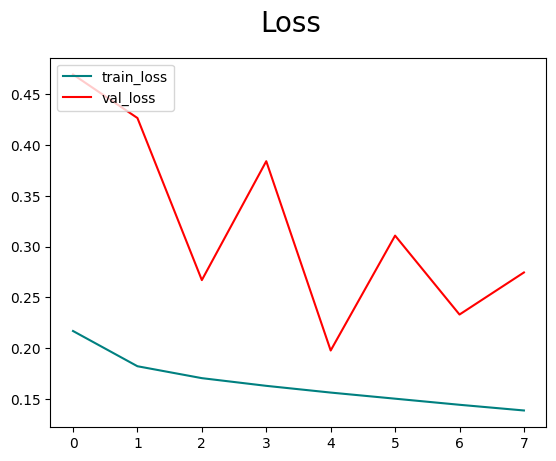

In [18]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='train_loss')
plt.plot(hist.history['val_loss'], color ='red', label ='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

# Evaluate on the test dataset

In [19]:
time_counter = time.time_ns()

preds_labels =  model.predict(X_test)
preds_labels = label_binarizer.inverse_transform(preds_labels)


testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(preds_labels)}")
testing_duration_per_item = testing_duration*(10**3)/len(preds_labels)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

937/937 [==============================] - 1s 1ms/step
Testing Duration : 1.8210991 s for a dataset length of 29980
Testing Duration per data : 0.06074379919946631 ms


normalized confusion matrix


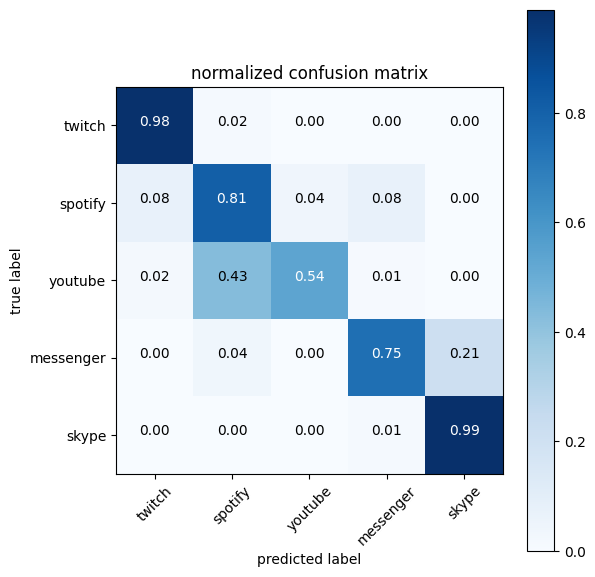

In [20]:
plot_confusion_matrix(y_test,preds_labels)

In [22]:
get_scores(y_test,preds_labels)

{'Accuracy': 0.8128117616321374,
 'Precision': 0.8948558321813459,
 'Recall': 0.7797865243495664,
 'F1_Score': 0.8049642366504374,
 'support': None}

# Evaluate on the train dataset

In [23]:
preds_labels =  model.predict(X_train)
preds_labels = label_binarizer.inverse_transform(preds_labels)
true_labels = label_binarizer.inverse_transform(y_train_encoded)

2189/2189 [==============================] - 3s 1ms/step


normalized confusion matrix


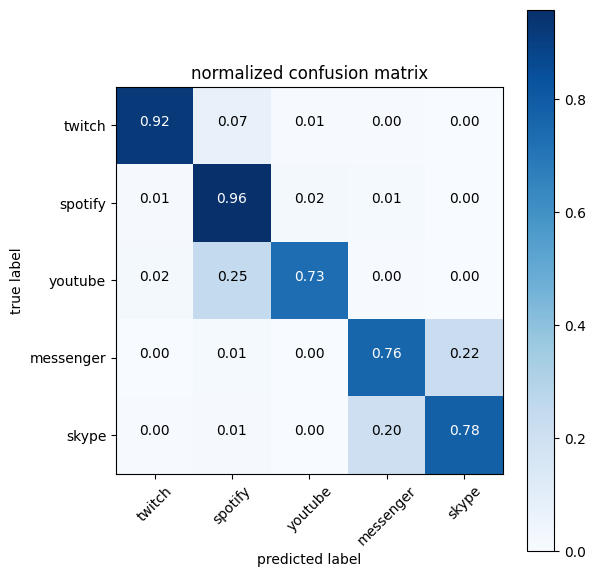

In [24]:
plot_confusion_matrix(y_train,preds_labels)